# Native Mini-batch K-means

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

RAND = 42

# load data
penguins = fetch_openml("penguins", as_frame=True)
data, target = penguins.data, penguins.target

# preprocessing

D = data.select_dtypes(include=["number"]).dropna()
idx_D = D.index
X_columns = D.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(D)
del D

from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(target[idx_D].to_numpy())

display(X_columns, X_scaled.shape, y.shape)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

(342, 4)

(342,)

In [2]:
from sklearn.model_selection import train_test_split
X_A, X_B, y_A, y_B = train_test_split(X_scaled, y, train_size=0.5, stratify=y, random_state=RAND, shuffle=True)
X_A1, X_A2, y_A1, y_A2 = train_test_split(X_A, y_A, train_size=0.5, stratify=y_A, random_state=RAND, shuffle=True)
X_B1, X_B2, y_B1, y_B2 = train_test_split(X_B, y_B, train_size=0.5, stratify=y_B, random_state=RAND, shuffle=True)
del X_A, X_B, y_A, y_B

display(X_A1.shape, X_A2.shape, X_B1.shape, X_B2.shape)

(85, 4)

(86, 4)

(85, 4)

(86, 4)

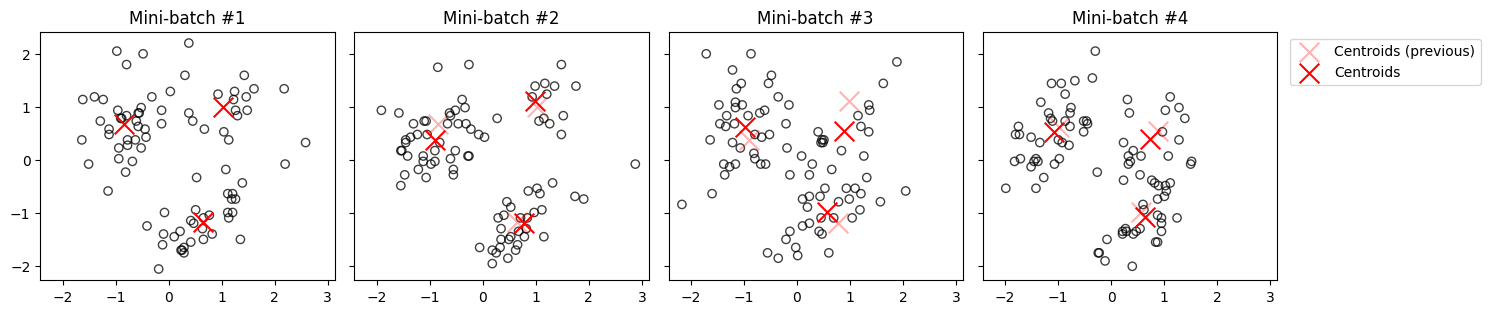

In [ ]:
from sklearn.cluster import KMeans

kmeans = None
centroids = None

fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)

for i, (D, y_part) in enumerate(zip([X_A1, X_A2, X_B1, X_B2], [y_A1, y_A2, y_B1, y_B2])):
	D_filt = D[:, :2]
	ax = axes[i]
	ax.set_title(f"Mini-batch #{i+1}")
	ax.scatter(*D_filt.T, color="none", edgecolor="black", alpha=.75)

	# Kmeans clustering

	if i == 0:
		kmeans = KMeans(n_clusters=3, random_state=RAND, max_iter=100, n_init=5)
		kmeans.fit(D)
		centroids = kmeans.cluster_centers_.copy()
	else:
		ax.scatter(*centroids[:, :2].T, marker="x", s=200, color="red", alpha=.3, label="Centroids (previous)")
		kmeans = KMeans(n_clusters=3, random_state=RAND, max_iter=10, init=centroids)
		kmeans.fit(D)
		centroids = kmeans.cluster_centers_
	
	ax.scatter(*centroids[:, :2].T, marker="x", s=200, color="red", label="Centroids")

for ax in axes:
	ax.set_aspect("equal")

plt.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()